In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import string
import os

# Generating dataset for compensation across different AA roles

np.random.seed(42)

roles = ['Flight Attendant', 'Gate Agent', 'Mechanic', 'Pilot', 'Contract Cleaner', 'Baggage Handler']
locations = ['Dallas', 'Charlotte', 'Phoenix', 'Miami', 'Chicago']
data = []

for role in roles:
    for loc in locations:
        base_pay = {'Flight Attendant': np.random.normal(47000, 7000),'Gate Agent': np.random.normal(42000, 5000),
            'Mechanic': np.random.normal(55000, 8000),'Pilot': np.random.normal(120000, 15000),
            'Contract Cleaner': np.random.normal(29000, 4000),
            'Baggage Handler': np.random.normal(33000, 4500)}[role]
        for _ in range(20):
            data.append({
                'Role': role,'Location': loc,'Annual Pay ($)': round(np.random.normal(base_pay, base_pay * 0.1), 2),
                'Tenure (Years)': round(np.random.uniform(0.5, 25), 1)})

df = pd.DataFrame(data)

# Add calculated comp-ratio (simulated midpoint per role)

midpoints = {'Flight Attendant': 47000,'Gate Agent': 42000,'Mechanic': 55000,'Pilot': 120000,'Contract Cleaner': 33000,'Baggage Handler': 36000}
df['Comp-Ratio'] = df.apply(lambda row: round(row['Annual Pay ($)'] / midpoints[row['Role']], 2), axis=1)

# Display the dataframe
df


,Role,Location,Annual Pay ($),Tenure (Years),Comp-Ratio
0,Flight Attendant,Dallas,58448.39,1.0,1.24
1,Flight Attendant,Dallas,54350.78,24.3,1.16
2,Flight Attendant,Dallas,48107.23,5.0,1.02
3,Flight Attendant,Dallas,53215.68,5.0,1.13
4,Flight Attendant,Dallas,51698.35,11.1,1.10
...,...,...,...,...,...
595,Baggage Handler,Chicago,32938.58,22.6,0.91
596,Baggage Handler,Chicago,24546.82,19.6,0.68
597,Baggage Handler,Chicago,26091.37,7.2,0.72
598,Baggage Handler,Chicago,27206.99,16.9,0.76


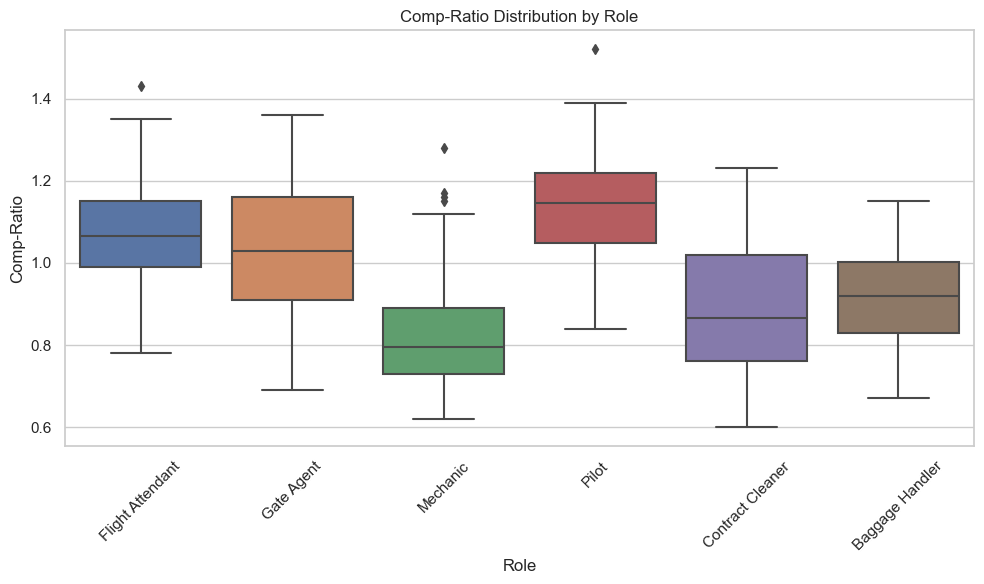

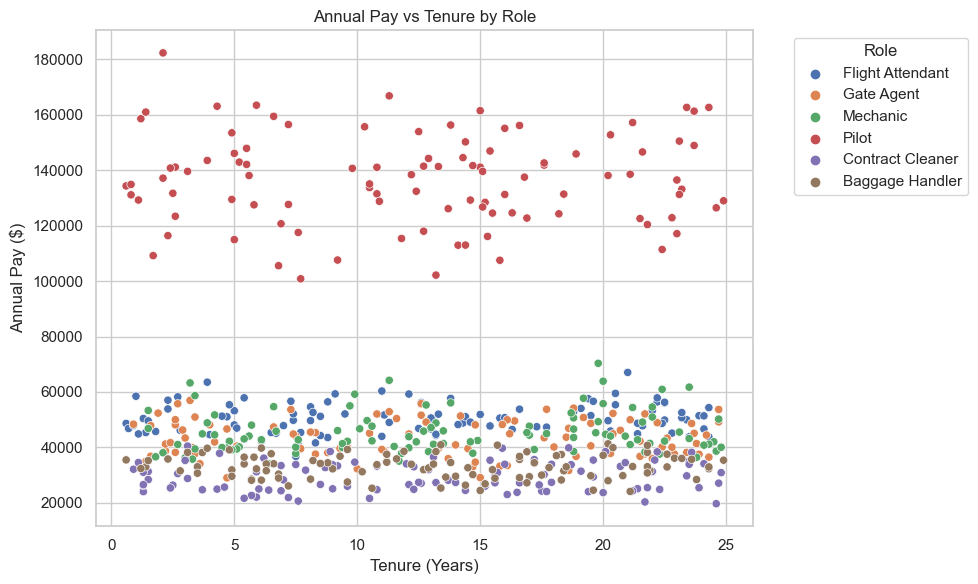

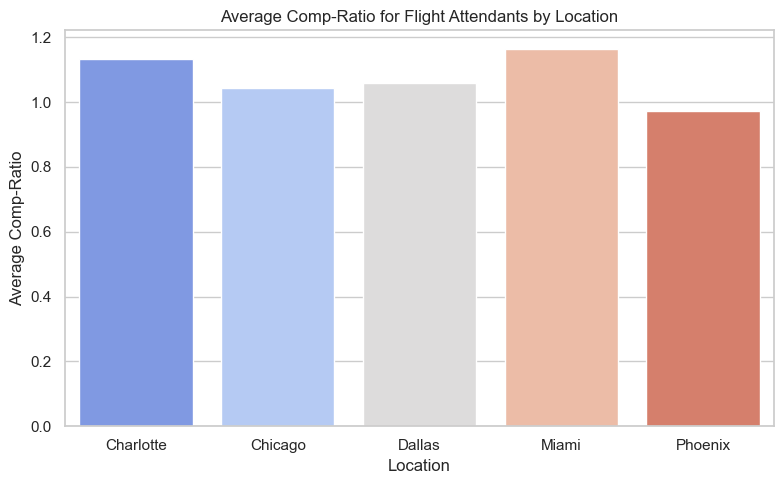

In [2]:
sns.set(style="whitegrid")

# Generating Comp-Ratio Distribution by Role

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Role', y='Comp-Ratio')
plt.title('Comp-Ratio Distribution by Role')
plt.xticks(rotation=45)
plt.ylabel('Comp-Ratio')
plt.xlabel('Role')
plt.tight_layout()
plt.show()

# Genearting Pay vs Tenure Scatter Plot by Role

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tenure (Years)', y='Annual Pay ($)', hue='Role')
plt.title('Annual Pay vs Tenure by Role')
plt.xlabel('Tenure (Years)')
plt.ylabel('Annual Pay ($)')
plt.legend(title='Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Generating Average Comp-Ratio by Location for Flight Attendants

fa_df = df[df['Role'] == 'Flight Attendant']
fa_avg_ratio = fa_df.groupby('Location')['Comp-Ratio'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=fa_avg_ratio, x='Location', y='Comp-Ratio', palette='coolwarm')
plt.title('Average Comp-Ratio for Flight Attendants by Location')
plt.ylabel('Average Comp-Ratio')
plt.xlabel('Location')
plt.tight_layout()
plt.show()

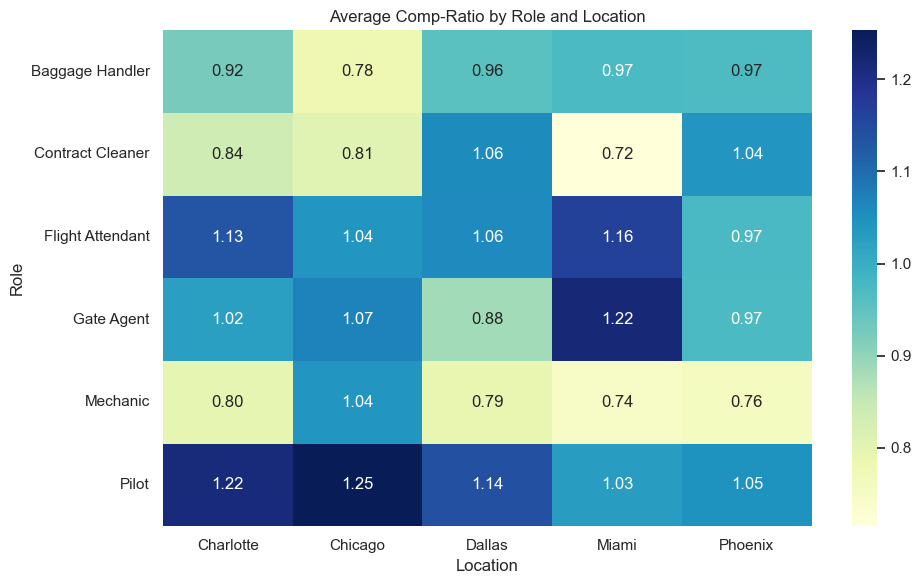

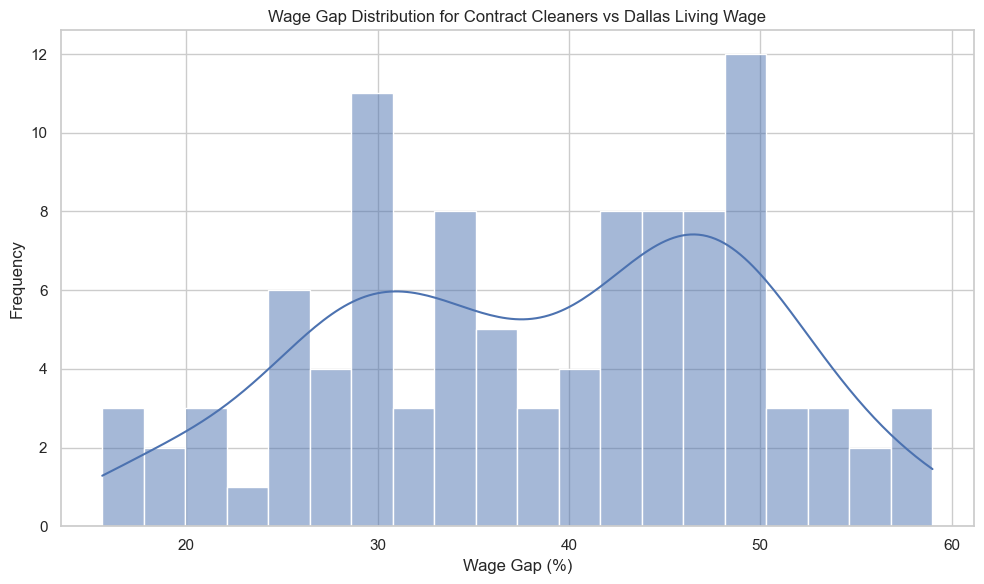

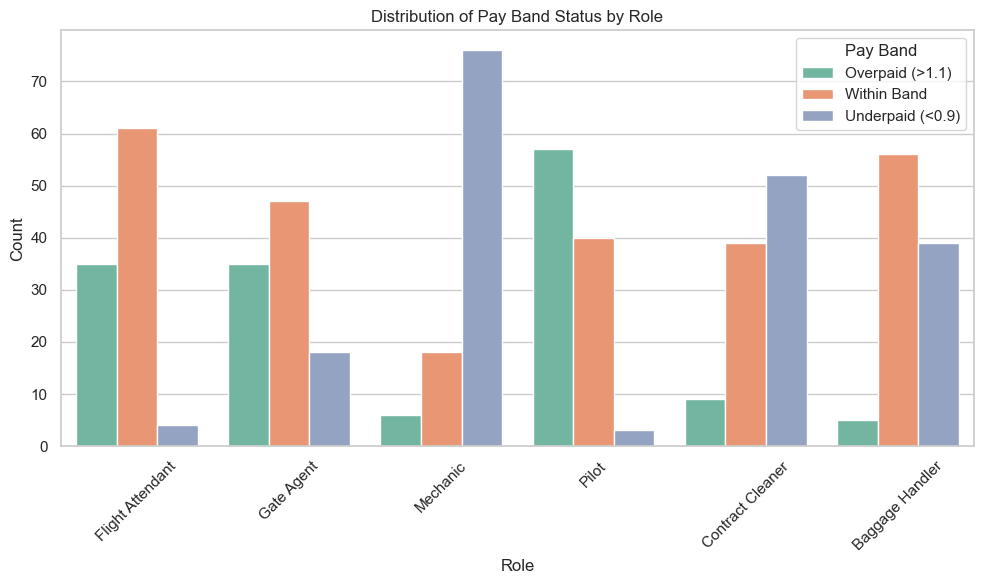

In [3]:
# For Equity Heatmap (Avg Comp-Ratio by Role and Location)

heatmap_data = df.groupby(['Role', 'Location'])['Comp-Ratio'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Comp-Ratio by Role and Location')
plt.ylabel('Role')
plt.xlabel('Location')
plt.tight_layout()
plt.show()

# For Contractor Wage Gap Analysis- Focusing on 'Contract Cleaner' and compare to living wage in Dallas

living_wage_annual = 23.06 * 2080  # full-time hours/year
contract_cleaner_df = df[df['Role'] == 'Contract Cleaner'].copy()
contract_cleaner_df.loc[:, 'Wage Gap (%)'] = contract_cleaner_df['Annual Pay ($)'].apply(lambda x: round((living_wage_annual - x) / living_wage_annual * 100, 1))

plt.figure(figsize=(10, 6))
sns.histplot(contract_cleaner_df['Wage Gap (%)'], bins=20, kde=True)
plt.title('Wage Gap Distribution for Contract Cleaners vs Dallas Living Wage')
plt.xlabel('Wage Gap (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Underpaid vs Overpaid (Comp-Ratio < 0.9 or > 1.1)

df['Pay Band'] = df['Comp-Ratio'].apply(lambda x: 'Underpaid (<0.9)' if x < 0.9 else ('Overpaid (>1.1)' if x > 1.1 else 'Within Band'))

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Role', hue='Pay Band', palette='Set2')
plt.title('Distribution of Pay Band Status by Role')
plt.ylabel('Count')
plt.xlabel('Role')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
